## Time Series EDA
- Single continuous variable over (uniformly distributed) time
- Understand temporal behavior of data: trend and seasonality, cycle
- Identify underlying distribution and nature of temporal processes producing data

#### Setup
°F = (K - 273.15) x 1.8000 + 32.00

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

In [2]:
# read csv file. Specify 'datetime' column as index column, parse dates and sort index

df = pd.read_csv('sa_temps.csv', index_col='datetime', parse_dates=True).sort_index()
df.temp = (df.temp - 273.15) * 1.8 + 32

print('Date Range:', df.index.min(), 'to', df.index.max())
print('Shape:', df.shape)

Date Range: 2012-10-01 13:00:00 to 2017-11-30 00:00:00
Shape: (45252, 1)


In [3]:
df.head()

,temp
datetime,
2012-10-01 13:00:00,61.052000
2012-10-01 14:00:00,61.076568
2012-10-01 15:00:00,61.139294
2012-10-01 16:00:00,61.202020
2012-10-01 17:00:00,61.264747


- **seasonality**: a repeated cycle in the data. Occurs at a fixed frequency. In our weather data there is yearly and daily seasonality  
    - Quite common in economic time series. It is less common in engineering and scientific data.
    - Can help us understand underlying dynamics


- **trend**: long term upwards or downwards movement  
- **cycle**: Some arbitrary chunk of time, usually longer than a season, or consists of multiple seasons

### Data Splitting

- Ideally all splits contain a season
- Human-based
- Percentage based
- Cross Validation

### Percentage-Based

In [4]:
# check shape of data
df.shape

(45252, 1)

In [5]:
# Lets use 70/30 train test split %

train_size = .70
n = df.shape[0] #shape of rows
test_start_index = round(train_size * n) #calc at what index
test_start_index #the first 31676 rows will be set as train

31676

In [7]:
# create train and test dataframe

train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end

In [8]:
train

,temp
datetime,
2012-10-01 13:00:00,61.052000
2012-10-01 14:00:00,61.076568
2012-10-01 15:00:00,61.139294
2012-10-01 16:00:00,61.202020
2012-10-01 17:00:00,61.264747
...,...
2016-05-13 04:00:00,75.614000
2016-05-13 05:00:00,75.002000
2016-05-13 06:00:00,74.246000


In [9]:
test

,temp
datetime,
2016-05-13 09:00:00,73.112
2016-05-13 10:00:00,71.546
2016-05-13 11:00:00,71.222
2016-05-13 12:00:00,70.754
2016-05-13 13:00:00,72.644
...,...
2017-11-29 20:00:00,70.790
2017-11-29 21:00:00,72.806
2017-11-29 22:00:00,73.202


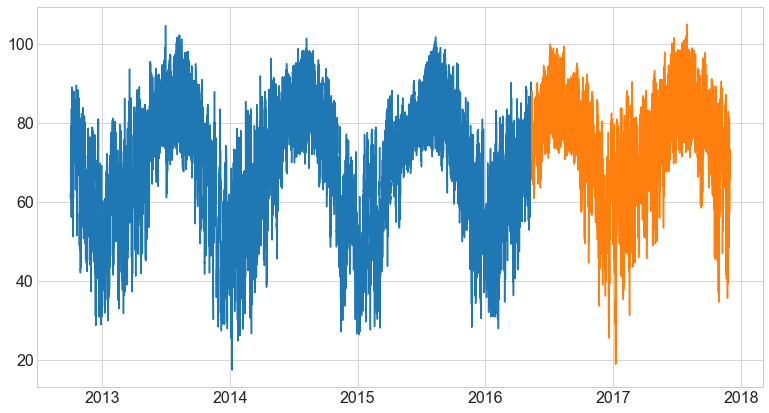

In [10]:
# lets plot train and test

plt.plot(train.index, train.temp) #train in blue
plt.plot(test.index, test.temp) #test is orange

### Human-Based
- look at data and make decision on your own

In [12]:
#subsetting data for train
df[:'2016']

,temp
datetime,
2012-10-01 13:00:00,61.052000
2012-10-01 14:00:00,61.076568
2012-10-01 15:00:00,61.139294
2012-10-01 16:00:00,61.202020
2012-10-01 17:00:00,61.264747
...,...
2016-12-31 19:00:00,63.230000
2016-12-31 20:00:00,68.216000
2016-12-31 21:00:00,70.664000


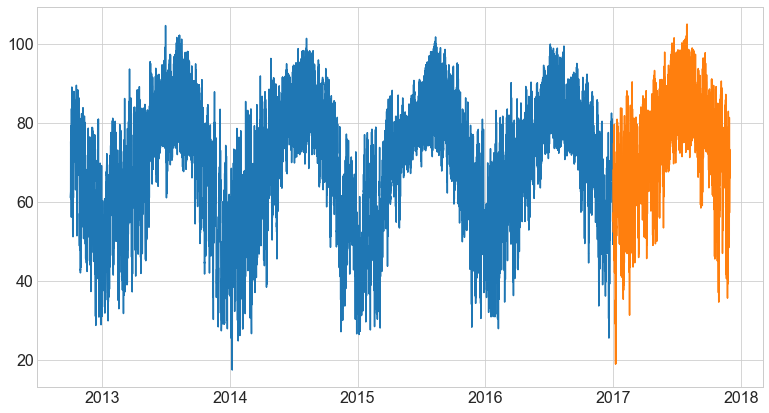

In [13]:
# Anything up to (and including) 2016 as train and rest as test

train = df[:'2016'] # includes 2016
test = df['2017']

# plot the train and test
plt.plot(train.index, train.temp)
plt.plot(test.index, test.temp) 

### Sklearn Cross-validation: 
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html

Visuals:
https://github.com/scikit-learn/scikit-learn/issues/14376

## Visualizations

In [14]:
# we will do visualization on train only:
train.head()

,temp
datetime,
2012-10-01 13:00:00,61.052000
2012-10-01 14:00:00,61.076568
2012-10-01 15:00:00,61.139294
2012-10-01 16:00:00,61.202020
2012-10-01 17:00:00,61.264747


In [15]:
# create a series called 'y' for simplicity when plotting

y = train.temp
y.head()

datetime
2012-10-01 13:00:00    61.052000
2012-10-01 14:00:00    61.076568
2012-10-01 15:00:00    61.139294
2012-10-01 16:00:00    61.202020
2012-10-01 17:00:00    61.264747
Name: temp, dtype: float64

### Don't consider the time series

<AxesSubplot:ylabel='Frequency'>

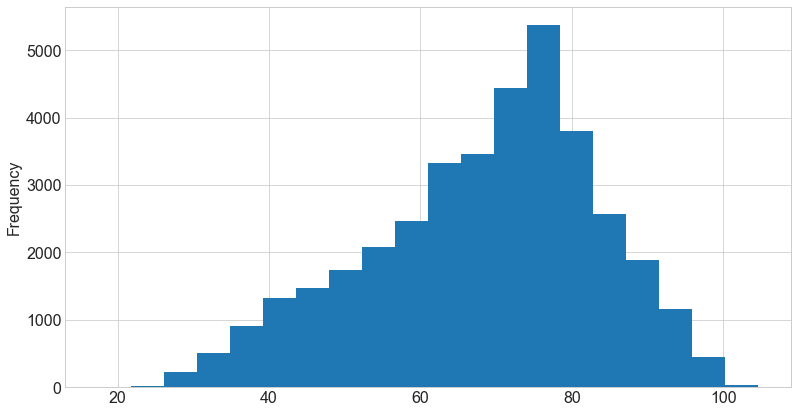

In [17]:
# plot a histogram of temperature
y.plot.hist(bins=20)

- by month
- by weekday

In [18]:
y.index.month

Int64Index([10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='datetime', length=37259)

In [19]:
#make a new col for 'month'
train['month'] = y.index.month

<ipython-input-19-1a264544d9fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['month'] = y.index.month


In [20]:
train.head()

,temp,month
datetime,,
2012-10-01 13:00:00,61.052000,10
2012-10-01 14:00:00,61.076568,10
2012-10-01 15:00:00,61.139294,10
2012-10-01 16:00:00,61.202020,10
2012-10-01 17:00:00,61.264747,10


In [26]:
train.groupby('month').temp.mean()

month
1     49.831129
2     55.558854
3     61.421913
4     68.855211
5     73.742506
6     80.614231
7     83.449665
8     83.964775
9     79.356778
10    72.065809
11    60.545556
12    54.689498
Name: temp, dtype: float64

<AxesSubplot:xlabel='month'>

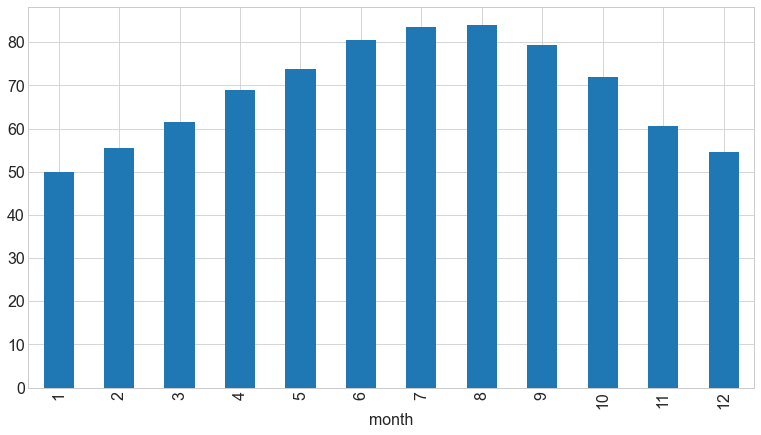

In [22]:
# Plot mean temperature by month (bar plot)

train.groupby('month').temp.mean().plot.bar()

In [23]:
#make a new col for 'weekday name'
train['weekday'] = y.index.day_name()

<ipython-input-23-24f94871dd11>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['weekday'] = y.index.day_name()


In [24]:
train.head()

,temp,month,weekday
datetime,,,
2012-10-01 13:00:00,61.052000,10,Monday
2012-10-01 14:00:00,61.076568,10,Monday
2012-10-01 15:00:00,61.139294,10,Monday
2012-10-01 16:00:00,61.202020,10,Monday
2012-10-01 17:00:00,61.264747,10,Monday


In [27]:
train.groupby('weekday').temp.mean()

weekday
Friday       68.170992
Monday       68.326222
Saturday     68.376767
Sunday       68.551504
Thursday     68.195680
Tuesday      68.417980
Wednesday    68.481428
Name: temp, dtype: float64

<AxesSubplot:xlabel='weekday'>

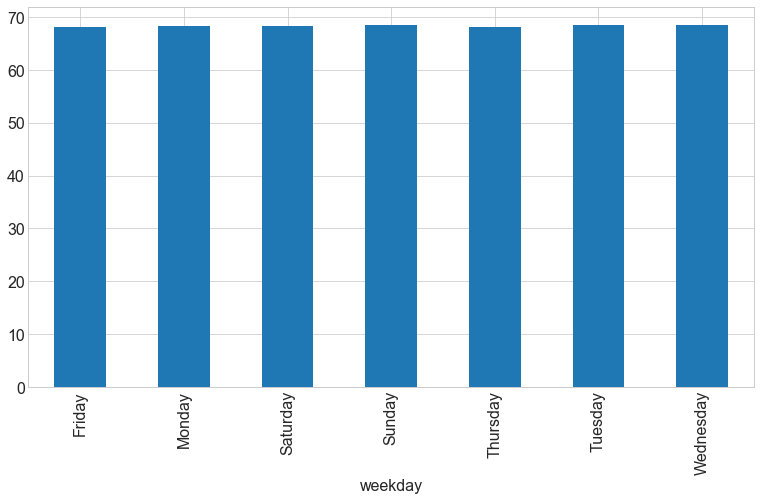

In [25]:
# Plot mean temperature by weekday

train.groupby('weekday').temp.mean().plot.bar()

- no seasonality based on weekday

#### What if we want to visualize more than just the mean temperature?

In [28]:
train.groupby('weekday').describe()

temp                                                      \
            count       mean        std      min       25%        50%   
weekday                                                                 
Friday     5328.0  68.170992  15.382317  24.7820  58.21550  71.105000   
Monday     5315.0  68.326222  15.330057  24.6560  58.54190  70.952000   
Saturday   5328.0  68.376767  14.682317  26.4740  59.34200  70.159805   
Sunday     5304.0  68.551504  14.673979  27.8780  59.68400  70.195400   
Thursday   5328.0  68.195680  15.571015  27.2078  57.59600  71.348000   
Tuesday    5328.0  68.417980  15.380445  17.4200  58.50950  71.432678   
Wednesday  5328.0  68.481428  15.146799  26.1500  57.98975  71.280884   

                                 month                                     \
                 75%       max   count      mean       std  min  25%  50%   
weekday                                                                     
Friday     78.476000  102.0920  5328.0  6.747748  3.518541  1.0  4.0  7.0   
Monday     79.034000  101.5160  5315.0  6.825588  3.501957  1.0  4.0  7.0   
Saturday   78.587375  101.8040  5328.0  6.779279  3.520021  1.0  4.0  7.0   
Sunday     78.836000  104.5400  5304.0  6.787330  3.506630  1.0  4.0  7.0   
Thursday   79.235660  102.0380  5328.0  6.765766  3.528736  1.0  4.0  7.0   
Tuesday    79.160000  101.6600  5328.0  6.815315  3.511847  1.0  4.0  7.0   
Wednesday  79.206350  100.7138  5328.0  6.788288  3.510321  1.0  4.0  7.0   

                       
            75%   max  
weekday                
Friday     10.0  12.0  
Monday     10.0  12.0  
Saturday   10.0  12.0  
Sunday     10.0  12.0  
Thursday   10.0  12.0  
Tuesday    10.0  12.0  
Wednesday  10.0  12.0

<AxesSubplot:xlabel='weekday', ylabel='temp'>

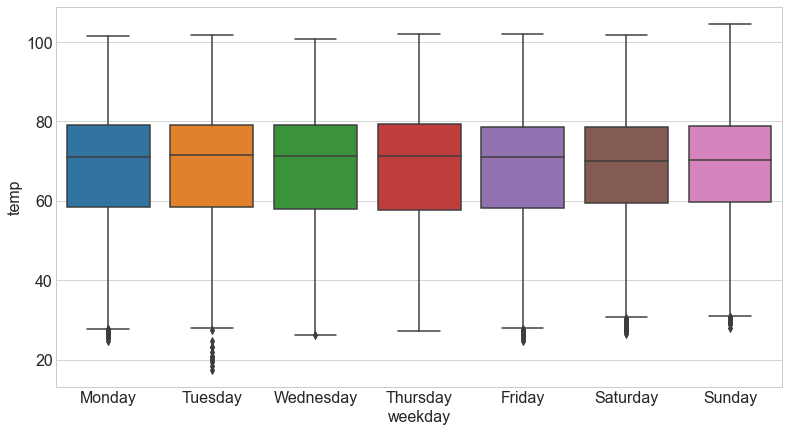

In [29]:
#boxplots show info from .describe()
sns.boxplot(data = train, x = 'weekday', y = 'temp')

In [ ]:
# Anything interesting in the chart above? Prob not

# Would the monthly boxplot look different? Prob yes

<AxesSubplot:xlabel='month', ylabel='temp'>

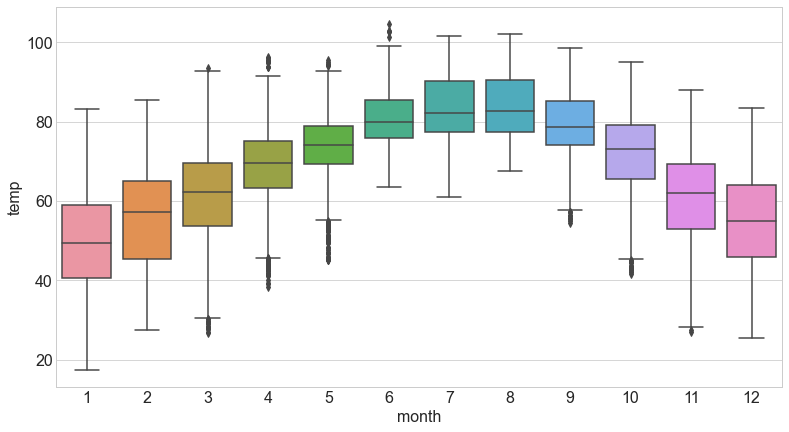

In [30]:
sns.boxplot(data = train, x = 'month', y = 'temp')

- more variation in temps in fall/winter
- less variation in temps in summer months

### Visualize the target over time

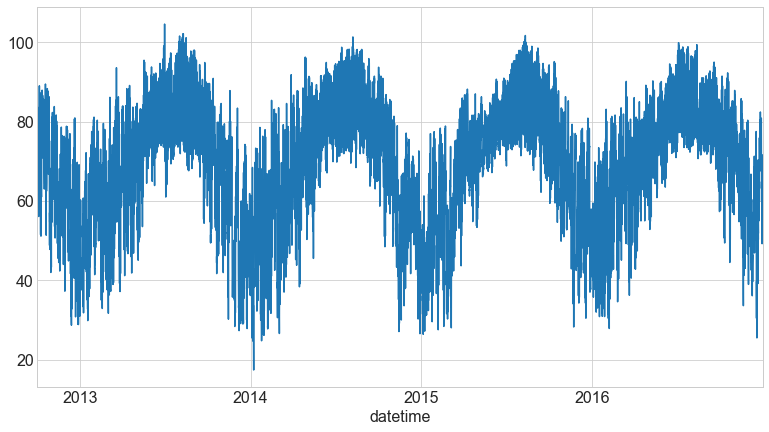

In [31]:
y.plot();

- we can try to suppress the noise by aggregation

In [32]:
y.resample('6H').mean()

datetime
2012-10-01 12:00:00    61.146926
2012-10-01 18:00:00    61.484289
2012-10-02 00:00:00    61.860647
2012-10-02 06:00:00    62.237005
2012-10-02 12:00:00    67.857637
                         ...    
2016-12-30 18:00:00    54.620000
2016-12-31 00:00:00    51.869000
2016-12-31 06:00:00    52.493000
2016-12-31 12:00:00    54.998000
2016-12-31 18:00:00    67.256000
Freq: 6H, Name: temp, Length: 6210, dtype: float64

<AxesSubplot:title={'center':'6 hour average'}, xlabel='datetime'>

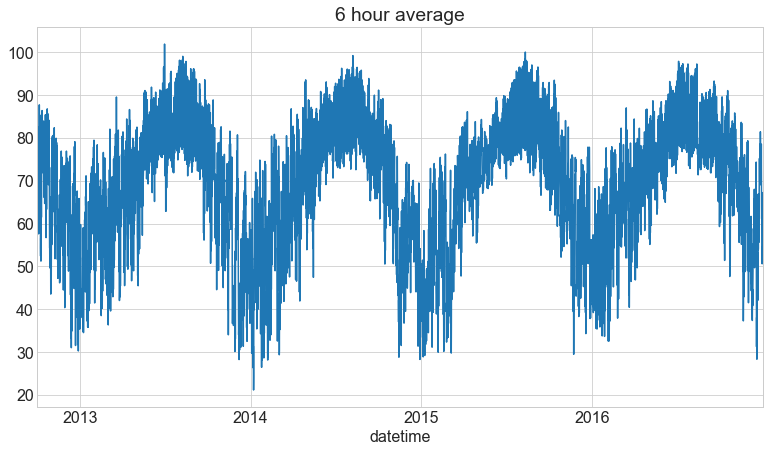

In [33]:
y.resample('6H').mean().plot(title='6 hour average')

shows a little less noise, but still see a diff in temp in day to day

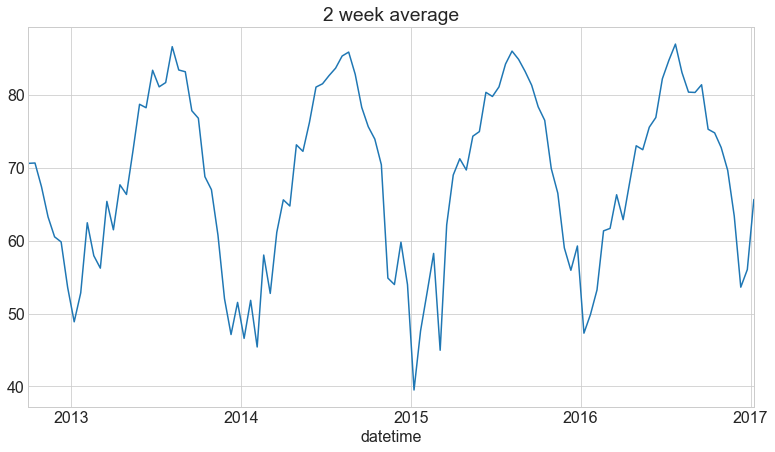

In [34]:
y.resample('2W').mean().plot(title='2 week average');

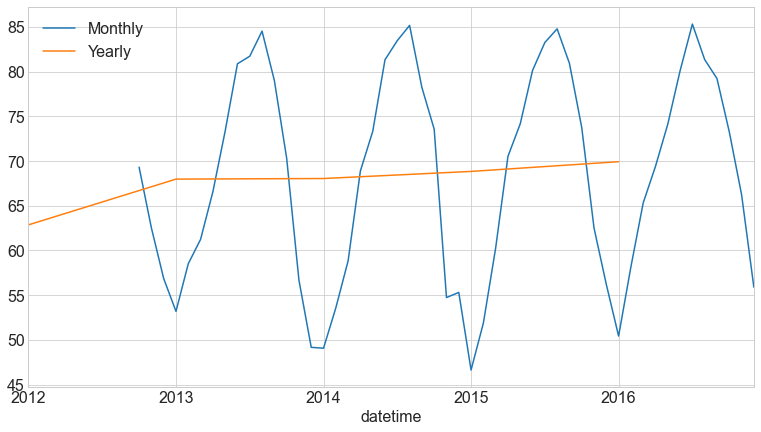

In [35]:
y.resample('M').mean().plot(label = 'Monthly')
y.resample('Y').mean().plot(label = 'Yearly')
plt.legend()

<AxesSubplot:xlabel='datetime'>

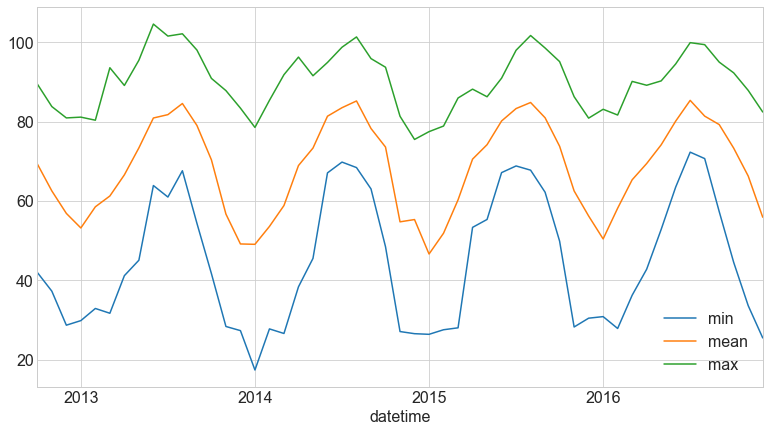

In [36]:
y.resample('M').agg(['min', 'mean', 'max']).plot()


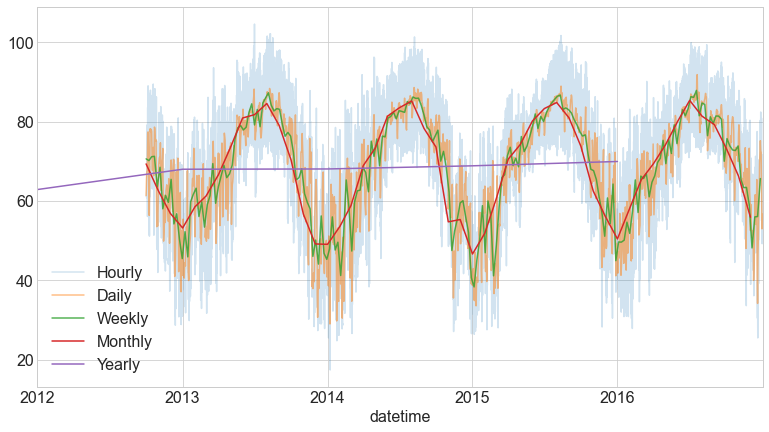

In [38]:
#combine all plots
y.plot(alpha=.2, label='Hourly') #alpha can specify transparency
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Monthly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()

In [ ]:
#### We can reduce noise by resampling data the data to longer frequencies.

##Seasonality to Trend


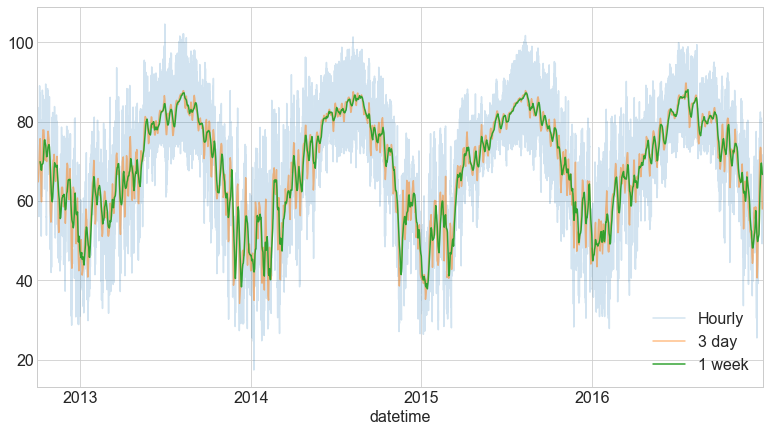

In [39]:
#another thing to do is to agg based on rolling avg
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().rolling(3).mean().plot(alpha=.5, label='3 day')
y.resample('D').mean().rolling(7).mean().plot(alpha=8, label='1 week')
plt.legend()

### Visualize change over time

In [41]:
y.resample('W').mean()
#want to look at this week's temp and the difference from next week
#how much the temp changes from this week to next week

datetime
2012-10-07    70.595201
2012-10-14    70.152821
2012-10-21    71.138375
2012-10-28    71.230464
2012-11-04    63.510554
                ...    
2016-12-04    59.062094
2016-12-11    48.163625
2016-12-18    55.979132
2016-12-25    56.073143
2017-01-01    65.640625
Freq: W-SUN, Name: temp, Length: 222, dtype: float64

<AxesSubplot:title={'center':'Average week-to-week change in temperature'}, xlabel='datetime'>

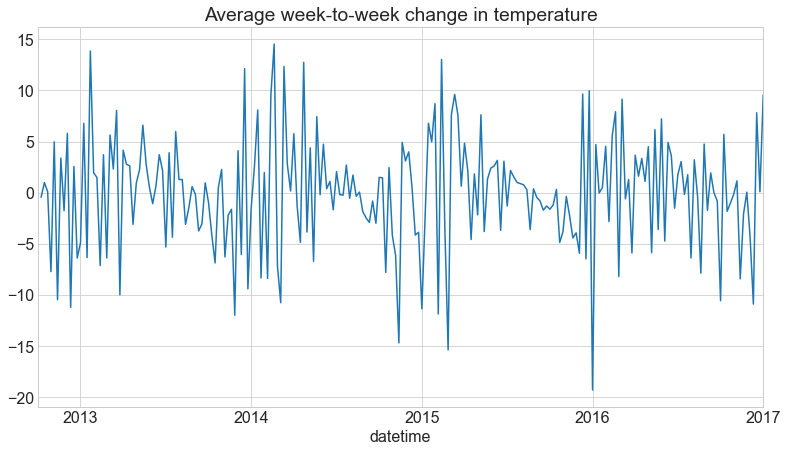

In [43]:
y.resample('W').mean().diff().plot(title='Average week-to-week change in temperature')

- higher weekly temp swings in fall and winder months

<AxesSubplot:title={'center':'Average month-to-month change in temperature'}, xlabel='datetime'>

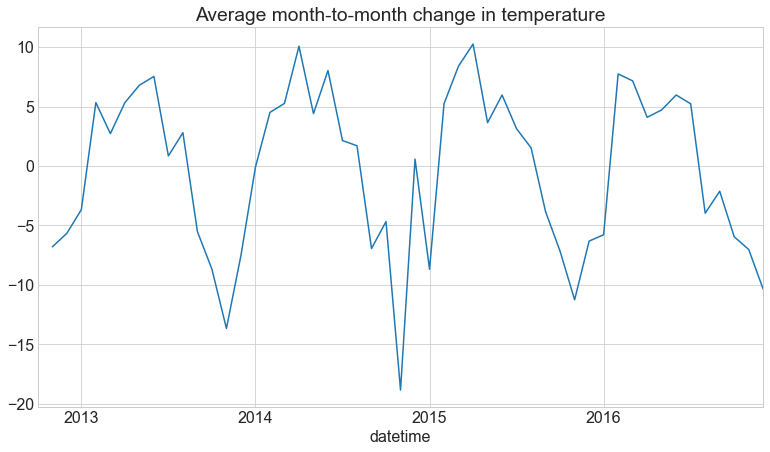

In [44]:
y.resample('M').mean().diff().plot(title='Average month-to-month change in temperature')

### Seasonal Plot
- comparison of multiple years together.

In [45]:
#group by year and month which shows multi-stack index
y.groupby([y.index.year, y.index.month]).mean() 

datetime  datetime
2012      10          69.318705
          11          62.521575
          12          56.860014
2013      1           53.192333
          2           58.522799
          3           61.244479
          4           66.569717
          5           73.358529
          6           80.885728
          7           81.731819
          8           84.534117
          9           79.016805
          10          70.343832
          11          56.686028
          12          49.165310
2014      1           49.072897
          2           53.579080
          3           58.842459
          4           68.908933
          5           73.311970
          6           81.337658
          7           83.476876
          8           85.178102
          9           78.238621
          10          73.567252
          11          54.735951
          12          55.311824
2015      1           46.631940
          2           51.874683
          3           60.277705
          4          

In [46]:
#unstack of 0 takes the highest index (years) you have and moves it to cols
# unstack is similar to pivot_table. It turns an index level into columns
y.groupby([y.index.year, y.index.month]).mean().unstack(0)

datetime,2012,2013,2014,2015,2016
datetime,,,,,
1,NaN,53.192333,49.072897,46.631940,50.427347
2,NaN,58.522799,53.579080,51.874683,58.165749
3,NaN,61.244479,58.842459,60.277705,65.323011
4,NaN,66.569717,68.908933,70.526879,69.415316
5,NaN,73.358529,73.311970,74.169747,74.129780
6,NaN,80.885728,81.337658,80.135967,80.097570
7,NaN,81.731819,83.476876,83.264325,85.325640
8,NaN,84.534117,85.178102,84.789859,81.357023
9,NaN,79.016805,78.238621,80.938208,79.233476


In [48]:
#without the 0 for unstack, it will turn rightmost index to cols
y.groupby([y.index.year, y.index.month]).mean().unstack()

datetime,1,2,3,4,5,6,7,8,9,10,11,12
datetime,,,,,,,,,,,,
2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.318705,62.521575,56.860014
2013,53.192333,58.522799,61.244479,66.569717,73.358529,80.885728,81.731819,84.534117,79.016805,70.343832,56.686028,49.165310
2014,49.072897,53.579080,58.842459,68.908933,73.311970,81.337658,83.476876,85.178102,78.238621,73.567252,54.735951,55.311824
2015,46.631940,51.874683,60.277705,70.526879,74.169747,80.135967,83.264325,84.789859,80.938208,73.766466,62.519181,56.207118
2016,50.427347,58.165749,65.323011,69.415316,74.129780,80.097570,85.325640,81.357023,79.233476,73.284788,66.265047,55.903224


<AxesSubplot:xlabel='datetime'>

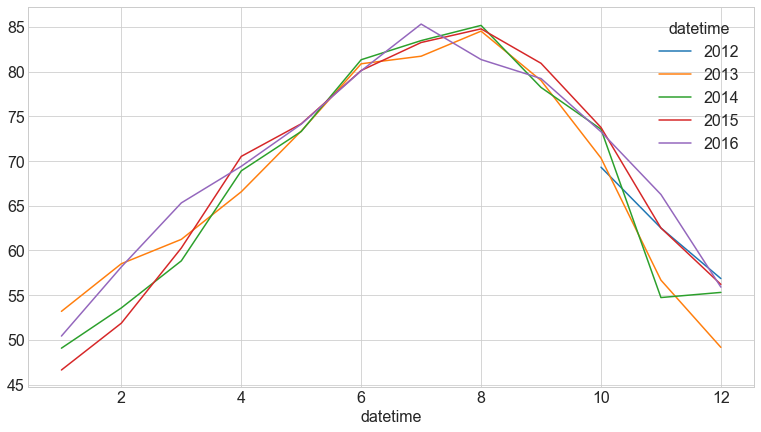

In [47]:
#now plot
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot()

### Seasonal Subseries Plot
A seasonal subseries plot shows the change year-over-year within each month.

In [49]:
table = y.groupby([y.index.year, y.index.month]).mean().unstack()
table

datetime,1,2,3,4,5,6,7,8,9,10,11,12
datetime,,,,,,,,,,,,
2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.318705,62.521575,56.860014
2013,53.192333,58.522799,61.244479,66.569717,73.358529,80.885728,81.731819,84.534117,79.016805,70.343832,56.686028,49.165310
2014,49.072897,53.579080,58.842459,68.908933,73.311970,81.337658,83.476876,85.178102,78.238621,73.567252,54.735951,55.311824
2015,46.631940,51.874683,60.277705,70.526879,74.169747,80.135967,83.264325,84.789859,80.938208,73.766466,62.519181,56.207118
2016,50.427347,58.165749,65.323011,69.415316,74.129780,80.097570,85.325640,81.357023,79.233476,73.284788,66.265047,55.903224


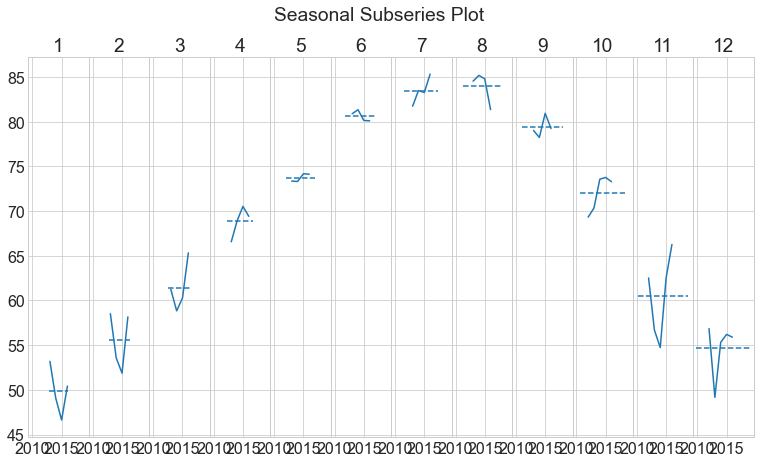

In [50]:
fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    x_left, x_right = ax.get_xlim()
    ax.hlines(subset.mean(), x_left, x_right, ls='--')
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

#### As with the monthly box plot, the seasonal pattern is quite evident in the seasonal subseries.

- Do the data exhibit a seasonal pattern? 
- What is the nature of the seasonality?
- Is there a within-group pattern (e.g., do January and July exhibit similar patterns)?
- Are there any outliers once seasonality has been accounted for?

- Should I use box plot instead?

### What if seasonality is not that readily apparent?

Is there a seasonality in this data? not really

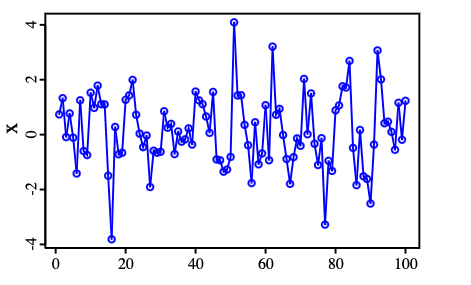

### Lag plot

In [51]:
y.shift(-1)

datetime
2012-10-01 13:00:00    61.076568
2012-10-01 14:00:00    61.139294
2012-10-01 15:00:00    61.202020
2012-10-01 16:00:00    61.264747
2012-10-01 17:00:00    61.327473
                         ...    
2016-12-31 19:00:00    68.216000
2016-12-31 20:00:00    70.664000
2016-12-31 21:00:00    71.348000
2016-12-31 22:00:00    71.600000
2016-12-31 23:00:00          NaN
Name: temp, Length: 37259, dtype: float64

Text(0.5, 1.0, 'Lag plot with lag = 1')

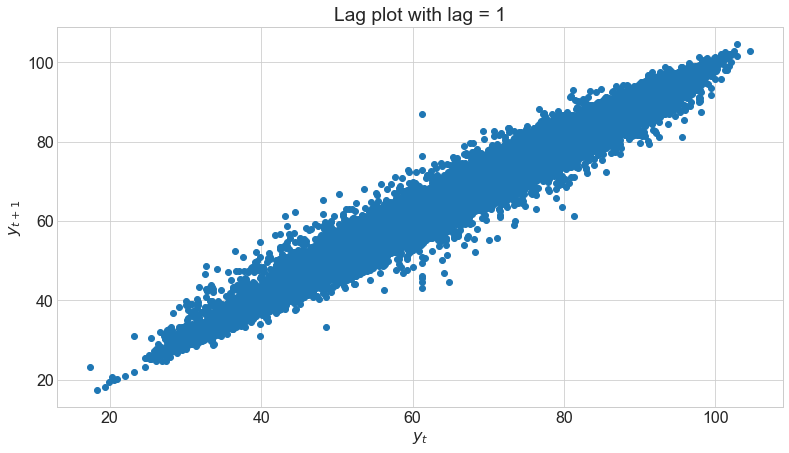

In [52]:
plt.scatter(y, y.shift(-1))
plt.xlabel('$y_t$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag = 1')

<AxesSubplot:xlabel='temp', ylabel='temp_next_day'>

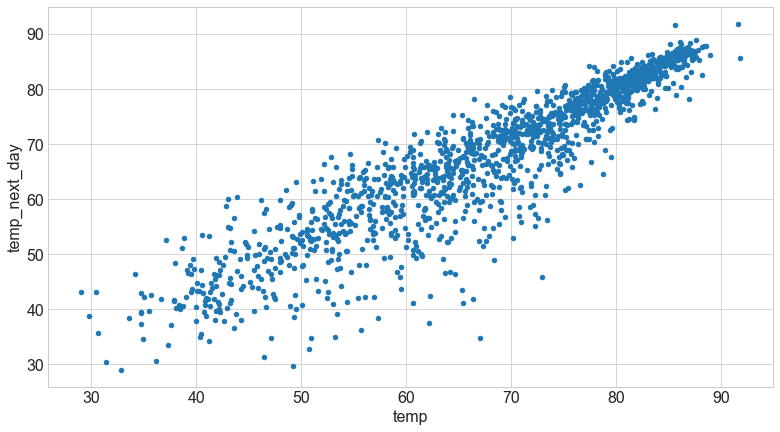

In [53]:
daily = train.resample('D').mean()
daily['temp_next_day'] = daily.temp.shift(-1)
daily.plot.scatter(x='temp', y='temp_next_day')

In [54]:
weekly = train.resample('W').mean()
weekly['temp_next_week'] = weekly.temp.shift(-1)

weekly

,temp,month,temp_next_week
datetime,,,
2012-10-07,70.595201,10.000000,70.152821
2012-10-14,70.152821,10.000000,71.138375
2012-10-21,71.138375,10.000000,71.230464
2012-10-28,71.230464,10.000000,63.510554
2012-11-04,63.510554,10.571429,68.482625
...,...,...,...
2016-12-04,59.062094,11.571429,48.163625
2016-12-11,48.163625,12.000000,55.979132
2016-12-18,55.979132,12.000000,56.073143


<AxesSubplot:xlabel='temp', ylabel='temp_next_week'>

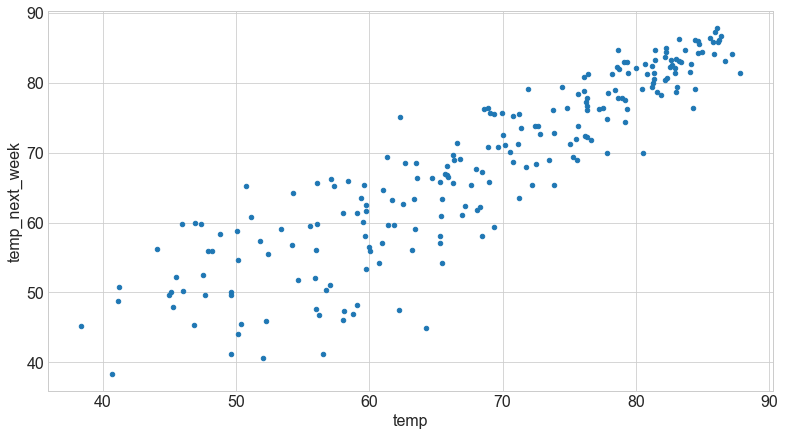

In [55]:
weekly.plot.scatter(x='temp', y='temp_next_week')

,this_week,month,12_weeks_out
datetime,,,
2012-10-07,70.595201,10.000000,50.376741
2012-10-14,70.152821,10.000000,45.473616
2012-10-21,71.138375,10.000000,52.252877
2012-10-28,71.230464,10.000000,45.907936
2012-11-04,63.510554,10.571429,59.763739
...,...,...,...
2016-12-04,59.062094,11.571429,NaN
2016-12-11,48.163625,12.000000,NaN
2016-12-18,55.979132,12.000000,NaN


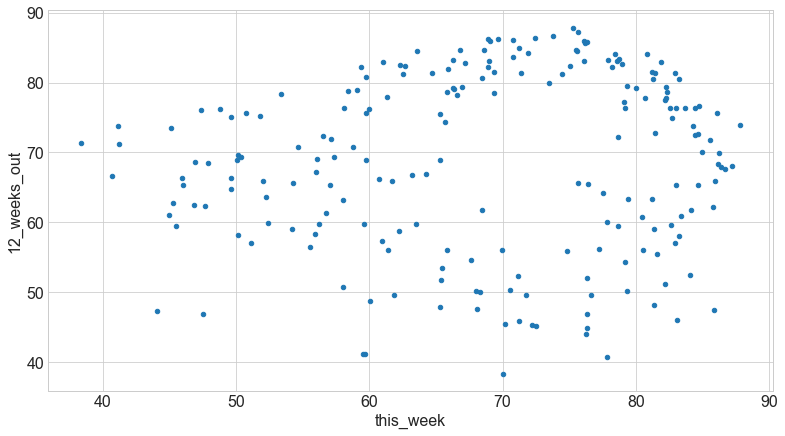

In [56]:
weekly = train.resample('W').mean()
weekly['12_weeks_out'] = weekly.temp.shift(-12)
weekly = weekly.rename(columns={'temp': 'this_week'})
weekly.plot.scatter(x='this_week', y='12_weeks_out')
weekly

,this_week,month,26_weeks_out
datetime,,,
2012-10-07,70.595201,10.000000,63.558611
2012-10-14,70.152821,10.000000,66.345532
2012-10-21,71.138375,10.000000,68.965502
2012-10-28,71.230464,10.000000,65.862071
2012-11-04,63.510554,10.571429,66.797107
...,...,...,...
2016-12-04,59.062094,11.571429,NaN
2016-12-11,48.163625,12.000000,NaN
2016-12-18,55.979132,12.000000,NaN


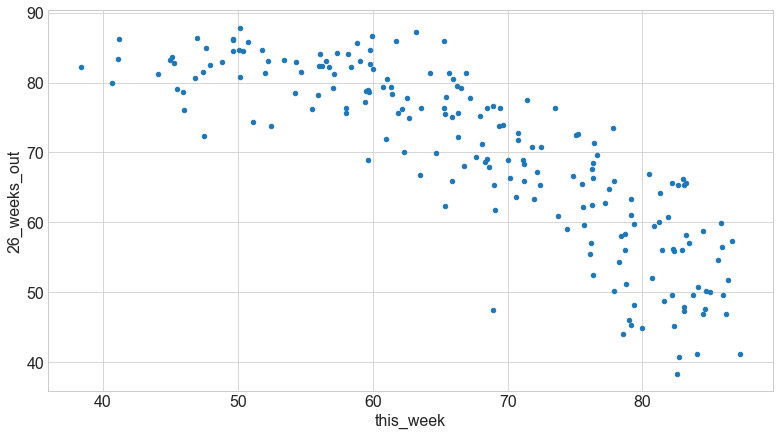

In [57]:
weekly = train.resample('W').mean()
weekly['26_weeks_out'] = weekly.temp.shift(-26)
weekly = weekly.rename(columns={'temp': 'this_week'})
weekly.plot.scatter(x='this_week', y='26_weeks_out')
weekly

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 26)'>

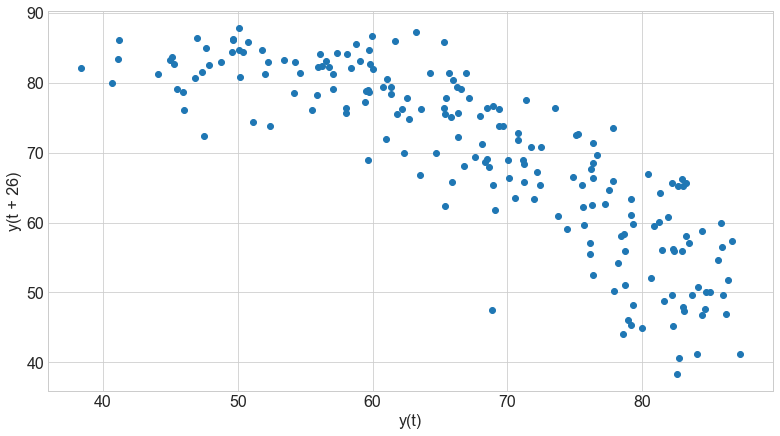

In [58]:
# easier way. Use pd.plotting.lag_plot(series, lag):

pd.plotting.lag_plot(train.temp.resample('W').mean(), lag=26)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 52)'>

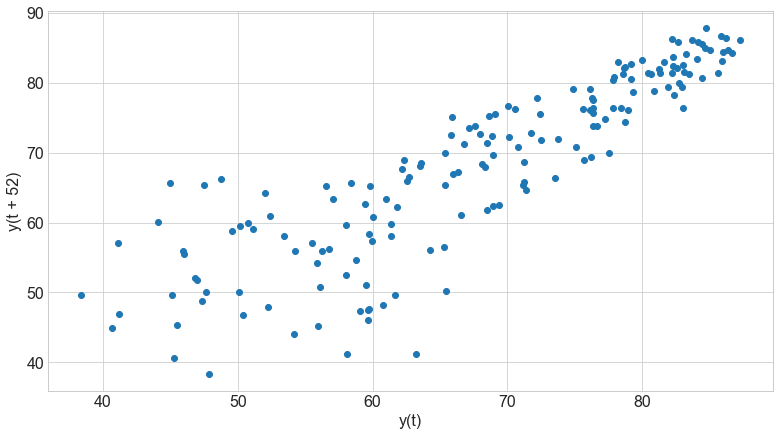

In [59]:
pd.plotting.lag_plot(train.temp.resample('W').mean(), lag=52)

### Autocorrelation Plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

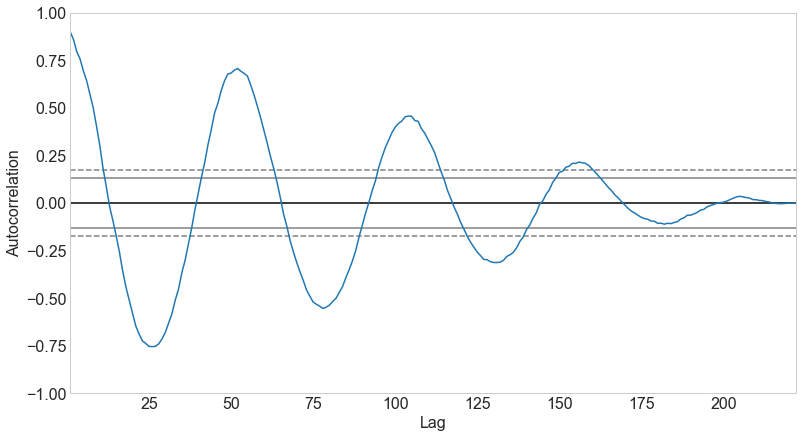

In [60]:
pd.plotting.autocorrelation_plot(train.temp.resample('W').mean())
#the horizontal lines are the 95%, 99% confidence intervals

### What does autocorrelation plot look like for white noise

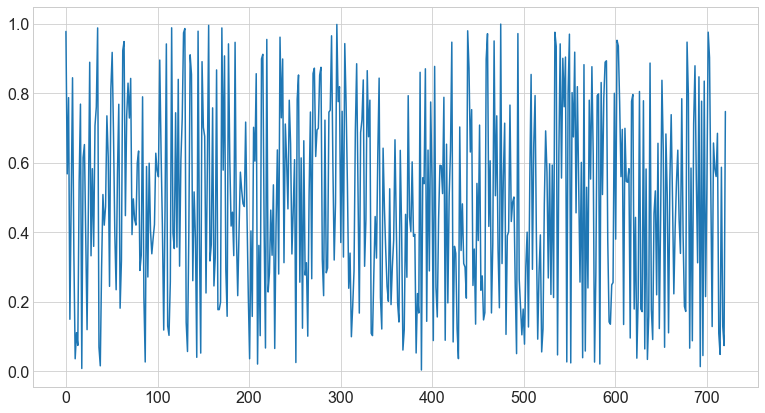

In [61]:
grid = np.linspace(0, 720, 500)
noise = np.random.rand(500)
# result_curve =  noise
plt.plot(grid, noise)

/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:652: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


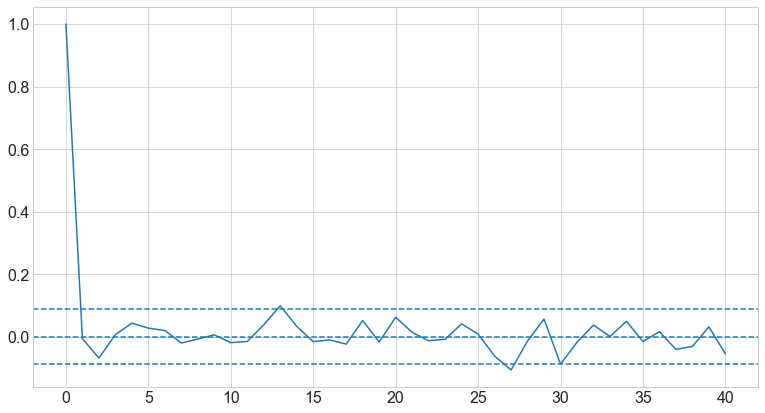

In [62]:
from statsmodels.tsa import stattools

acf_result = stattools.acf(noise)
plt.plot(acf_result)
plt.axhline(y=0,linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(noise)),linestyle='--')
plt.axhline(y=1.96/np.sqrt(len(noise)),linestyle='--')

### Another example of Autocorrelation

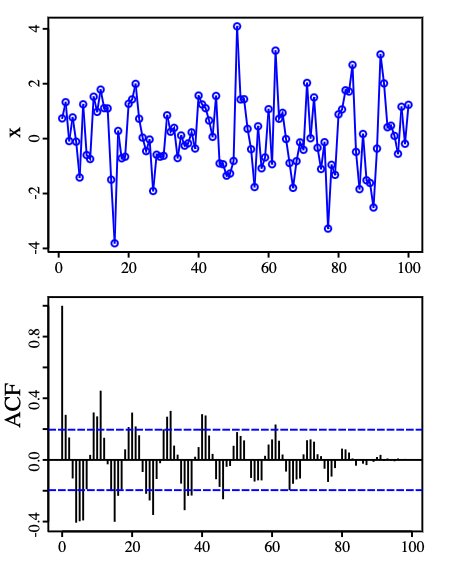

#### Visuals seasonal subseries plot and the box plot assume that the seasonal periods are known. However, if the seasonality period is not readlity apparent , the autocorrelation plot can help. 
#### If there is significant seasonality, the autocorrelation plot should show spikes at lags equal to the period.

### Seasonal Decomposition

$$ y = S + T + \epsilon $$

Seasonality + Trend + Residual

In [63]:
y = train.temp.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
result

In [64]:
result.seasonal

datetime
2012-10-07     8.545501
2012-10-14     7.255470
2012-10-21     2.468309
2012-10-28     1.820126
2012-11-04    -0.114287
                ...    
2016-12-04   -14.650102
2016-12-11   -13.263237
2016-12-18   -12.765114
2016-12-25   -13.857895
2017-01-01   -24.587601
Freq: W-SUN, Name: seasonal, Length: 222, dtype: float64

In [70]:
result.trend

datetime
2012-10-07   NaN
2012-10-14   NaN
2012-10-21   NaN
2012-10-28   NaN
2012-11-04   NaN
              ..
2016-12-04   NaN
2016-12-11   NaN
2016-12-18   NaN
2016-12-25   NaN
2017-01-01   NaN
Freq: W-SUN, Name: trend, Length: 222, dtype: float64

In [69]:
result.resid

datetime
2012-10-07   NaN
2012-10-14   NaN
2012-10-21   NaN
2012-10-28   NaN
2012-11-04   NaN
              ..
2016-12-04   NaN
2016-12-11   NaN
2016-12-18   NaN
2016-12-25   NaN
2017-01-01   NaN
Freq: W-SUN, Name: resid, Length: 222, dtype: float64

In [71]:
# Make a dataframe:

decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
datetime,,,,
2012-10-07,70.595201,NaN,8.545501,NaN
2012-10-14,70.152821,NaN,7.255470,NaN
2012-10-21,71.138375,NaN,2.468309,NaN
2012-10-28,71.230464,NaN,1.820126,NaN
2012-11-04,63.510554,NaN,-0.114287,NaN


<AxesSubplot:xlabel='datetime'>

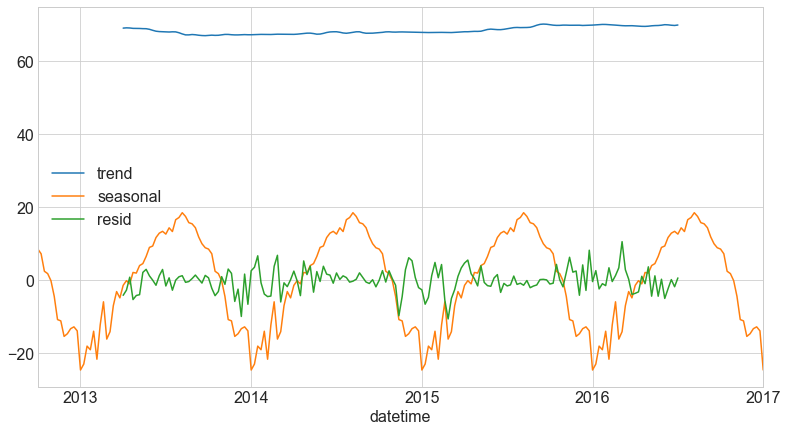

In [72]:
decomposition.iloc[:, 1:].plot()
#don't want the y col ([:, 1:])

<AxesSubplot:xlabel='datetime'>

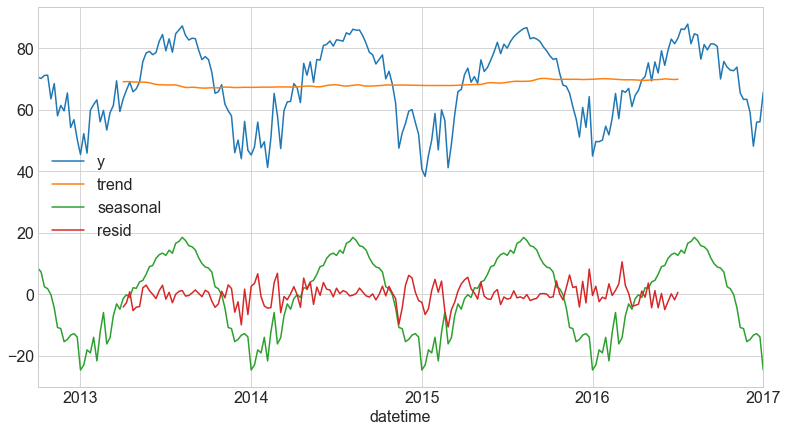

In [78]:
#with the y
decomposition.plot()

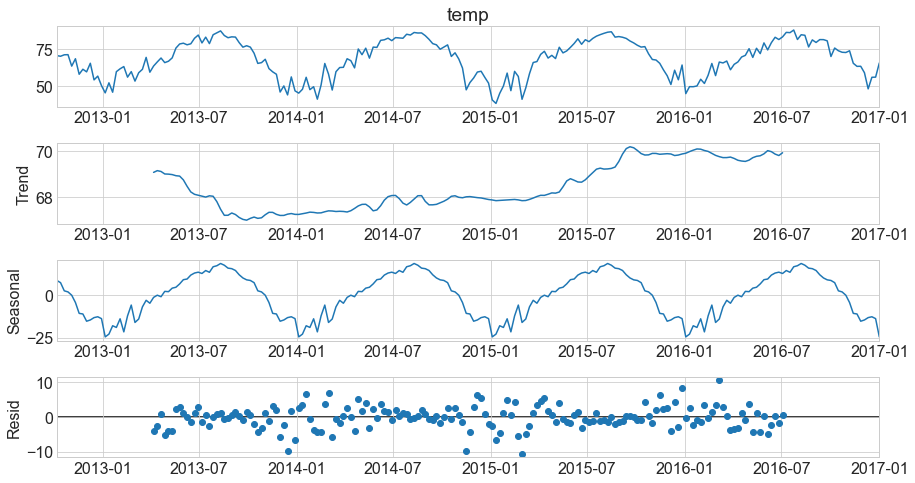

In [73]:
#another way to plot w/out making the df
# the value returned from seasonal_decompose can itself be plotted:
result.plot()
None

### Additive or multiplicative seasonality?


The additive model is most appropriate if the magnitude of the seasonal fluctuations or the variation around the trend-cycle does not vary with the level of the time series. When the variation in the seasonal pattern, or the variation around the trend-cycle, appears to be proportional to the level of the time series, then a multiplicative model is more appropriate. 


https://kourentzes.com/forecasting/2014/11/09/additive-and-multiplicative-seasonality/

### Categories over time

In [79]:
train = train.resample('D').mean()
train.head()

,temp,month
datetime,,
2012-10-01,61.330942,10
2012-10-02,65.678822,10
2012-10-03,67.411250,10
2012-10-04,67.703750,10
2012-10-05,77.073125,10


In [80]:
# create a categorical feature
train['temp_bin'] = pd.qcut(train.temp, 4, labels=['cold', 'cool', 'warm', 'hot'])
train.groupby('temp_bin').temp.mean()

temp_bin
cold    49.381699
cool    65.200219
warm    75.447977
hot     83.449087
Name: temp, dtype: float64

How can we visualize the temp_bin feature over time?

In [81]:
train.head()

,temp,month,temp_bin
datetime,,,
2012-10-01,61.330942,10,cool
2012-10-02,65.678822,10,cool
2012-10-03,67.411250,10,cool
2012-10-04,67.703750,10,cool
2012-10-05,77.073125,10,warm


Text(0, 0.5, '% of days in the month')

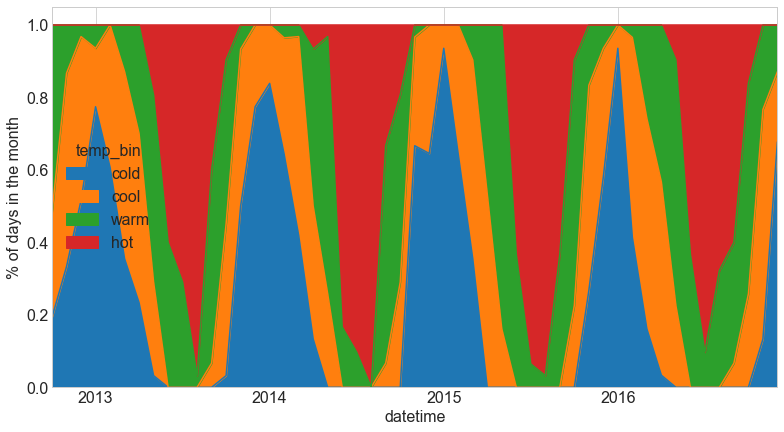

In [82]:
(train.groupby('temp_bin')
 .resample('M')
 .size() # like COUNT(*)
 .unstack(0) # turns an index level into columns
 .fillna(0)
 .astype(int)
 .apply(lambda row: row / row.sum(), axis=1) # raw nums to % of the row
 .plot.area()
)
plt.ylabel('% of days in the month')

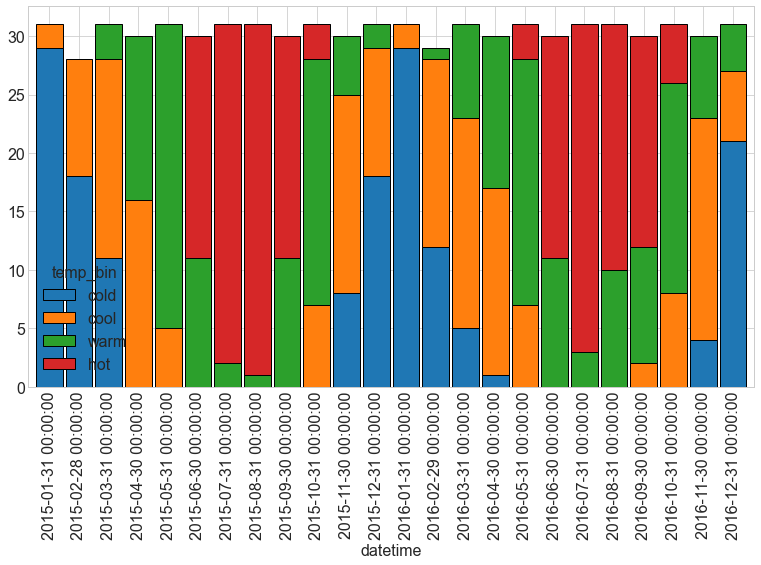

In [83]:
ax = (train['2015':'2016']
 .groupby('temp_bin')
 .resample('M')
 .size()
 .unstack(0)
 .plot.bar(stacked=True, width=.9, ec='black')
)

In [84]:
# take the existing labels, convert them to Timestamps, and then reformat with .strftime
labels = [pd.to_datetime(t.get_text()).strftime('%B') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels);

In [85]:
labels

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December',
 'January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

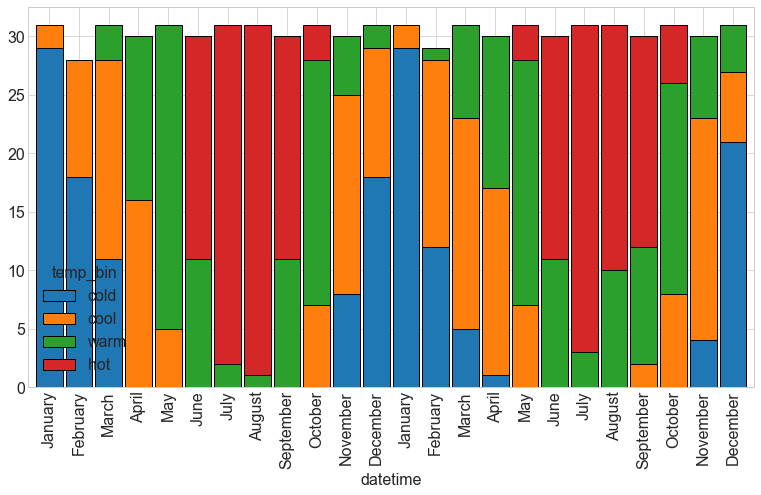

In [86]:
ax = (train['2015':'2016']
 .groupby('temp_bin')
 .resample('M')
 .size()
 .unstack(0)
 .plot.bar(stacked=True, width=.9, ec='black')
)

labels = [pd.to_datetime(t.get_text()).strftime('%B') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels);

### strftime

In [88]:
y.index.strftime('%m-%b')

Index(['10-Oct', '10-Oct', '10-Oct', '10-Oct', '11-Nov', '11-Nov', '11-Nov',
       '11-Nov', '12-Dec', '12-Dec',
       ...
       '10-Oct', '11-Nov', '11-Nov', '11-Nov', '11-Nov', '12-Dec', '12-Dec',
       '12-Dec', '12-Dec', '01-Jan'],
      dtype='object', name='datetime', length=222)

In [89]:
y.groupby(y.index.strftime('%m-%b')).mean()

datetime
01-Jan    49.394908
02-Feb    56.341421
03-Mar    59.674702
04-Apr    68.366173
05-May    73.356336
06-Jun    80.098207
07-Jul    83.149804
08-Aug    84.339747
09-Sep    79.983764
10-Oct    72.709785
11-Nov    62.275370
12-Dec    54.859875
Name: temp, dtype: float64

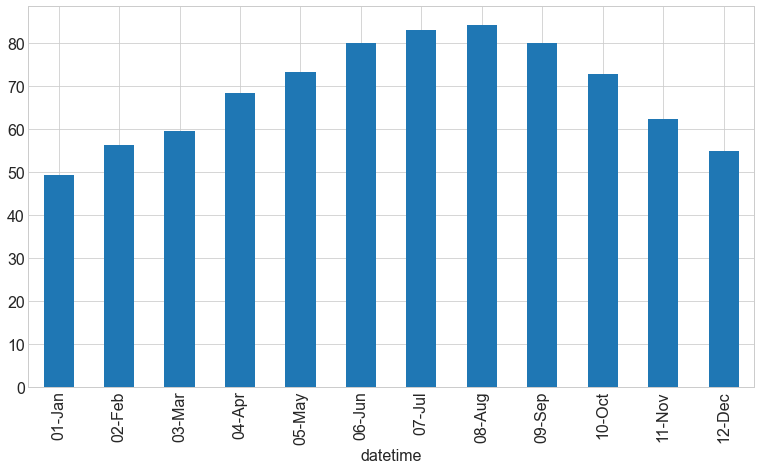

In [87]:
ax = y.groupby(y.index.strftime('%m-%b')).mean().plot.bar()

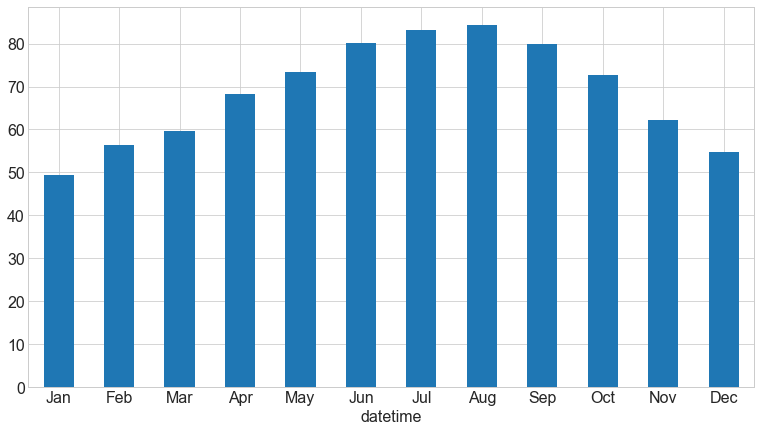

In [90]:
ax = y.groupby(y.index.strftime('%m-%b')).mean().plot.bar()
ax.set_xticklabels([t.get_text()[3:] for t in ax.get_xticklabels()], rotation=0);

### Matplotlib Dates
This will only work with plt.plot or ax.plot, not with the pandas plotting!

<AxesSubplot:xlabel='datetime'>

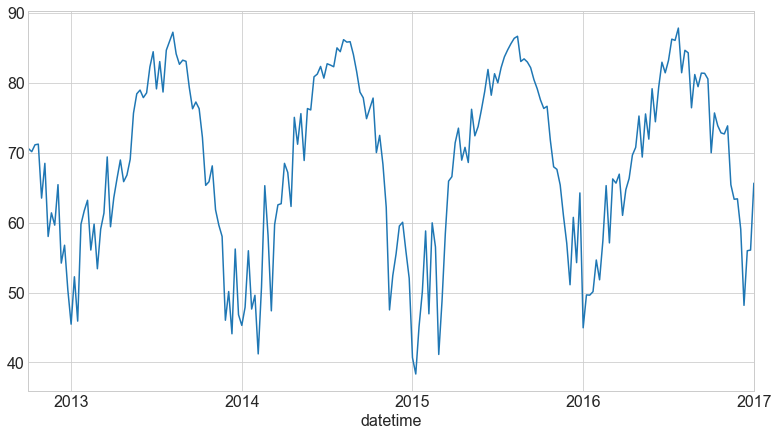

In [91]:
# how can I customize the x axis label here?

y.resample('W').mean().plot()

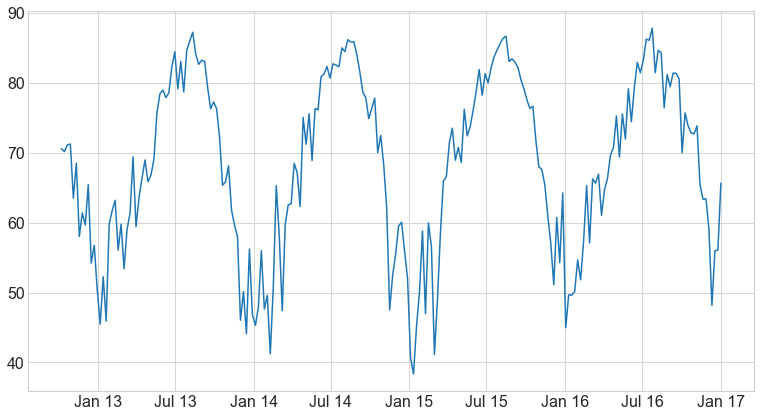

In [92]:
from matplotlib.dates import DateFormatter

fig, ax = plt.subplots()

weekly = y.resample('W').mean()

ax.plot(weekly.index, weekly)

ax.xaxis.set_major_formatter(DateFormatter('%b %y'))